In [ ]:
Data Science & Business analytics (July2021)

Author - Dipak Patil

Task:- 2 Prediction using Unsupervised ML

problem Statment - From the given iris dataset, predict the optimum number of clusters & represent it visually. 

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) #see the first 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
# Finding the optimum number of clusters for k-means classification

x  = iris_df.iloc[:, [0,1,2,3]].values 

In [4]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,                       n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_ )

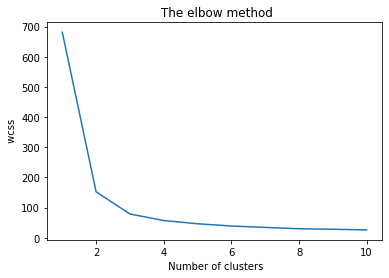

In [6]:
# Plotting the results onto a line graph,
# Allowing us to observe The elbow

plt.plot(range(1,11), wcss)
plt.title(' The elbow method')
plt.xlabel(' Number of clusters')
plt.ylabel(' wcss') # within cluster sum of squares
plt.show()

In [5]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,                       n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

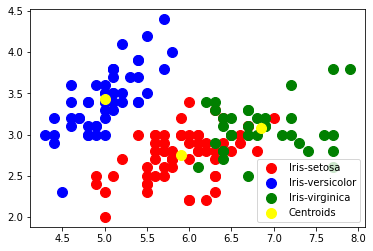

In [6]:
# Visulalising the clusters - on the first two columns

plt.scatter(x[y_kmeans == 0, 0 ], x[y_kmeans == 0, 1], s =100, c = 'red',
            label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0 ], x[y_kmeans == 1, 1], s =100, c = 'blue',
            label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0 ], x[y_kmeans == 2, 1], s =100, c ='green',            label = 'Iris-virginica')
# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 100, c = 'yellow', label = 'Centroids' )

plt.legend()